In [63]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
import data_utils

import keras.backend as K

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
dataset = pd.read_csv("datasets/dataset.csv")
display(dataset.head(n = 5))

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)


def precision(y_true, y_pred):
    """
    Precision metric.
     Only computes a batch-wise average of precision.
     Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """
    Recall metric.
     Only computes a batch-wise average of recall.
     Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=2):
    """Computes the F score.
     The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
     This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
     With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
     # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,9.569570e-01,7.687688e-01,9.999999e-01,5.765766e-01,7.572573e-01,0.938939,6.041041e-01,7.367367e-01,6.211211e-01,9.999999e-01,...,0.646647,0.943443,0.898899,1.0,1.000000,1.000000,1.000000,0.743744,0.246246,1
1,1.000000e-07,9.999999e-01,1.000000e-07,5.765766e-01,1.000000e-07,0.206707,9.819820e-01,1.000000e-07,6.211211e-01,9.999999e-01,...,0.646647,0.662162,0.470470,1.0,0.638138,1.000000,1.000000,0.743744,1.000000,0
2,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.206707,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,...,0.646647,0.212212,0.162162,1.0,0.638138,0.487237,1.000000,0.367367,0.684184,0
3,6.231231e-01,4.489489e-01,1.000000e-07,5.765766e-01,1.000000e-07,0.680180,6.041041e-01,1.000000e-07,6.211211e-01,9.999999e-01,...,0.338338,0.462963,0.327828,1.0,0.286787,1.000000,0.152152,0.743744,1.000000,0
4,4.184184e-01,7.687688e-01,6.376376e-01,9.999999e-01,7.572573e-01,0.896897,6.231231e-01,7.367367e-01,6.211211e-01,9.999999e-01,...,0.985485,0.316817,0.953954,1.0,0.286787,1.000000,0.152152,0.743744,0.246246,1


In [64]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=1)



from numpy import array

X_train = np.asarray(list(map(lambda row: row.reshape(7,5,1), X_train)))
X_test = np.asarray(list(map(lambda row: row.reshape(7,5,1), X_test)))
X_val = np.asarray(list(map(lambda row: row.reshape(7,5,1), X_val)))

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


display(y_train.shape)
display(y_test.shape)
display(y_val.shape)

(1805281, 7, 5, 1)

(361056, 7, 5, 1)

(90265, 7, 5, 1)

(1805281, 2)

(361056, 2)

(90265, 2)

## Treating features as spatial features

In [65]:
#Taking a samples from the two categories (1 and 0)
mX_train = np.asarray(list(map(lambda row: row.reshape(7,5), features.values)))
mY_train = to_categorical(labels, 2)

images_0 = data_utils.getSample(mX_train, mY_train, 0, 20)
images_1 = data_utils.getSample(mX_train, mY_train, 1, 20)

### Sample for records with label = 0

In [66]:
def scale_number(x, xMin, xMax, a, b):
    return ((x - xMin) / (xMax - xMin))*(b - a) + a

def plotFeatures(images, columns):
    plt.figure(figsize=(20,10))
    average = []
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)
        average.append(np.average(image))

    print("Average gray scale: %f"%(scale_number(np.average(average), 0, 1, 0, 255)))

Average gray scale: 110.187568


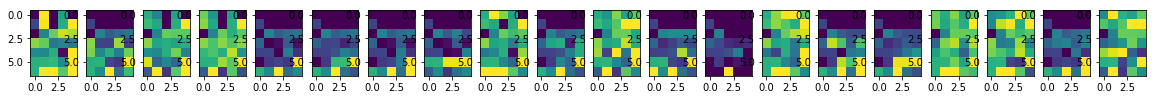

In [67]:
plotFeatures(images_0, 20)

### Sample for records with label = 1

Average gray scale: 181.278950


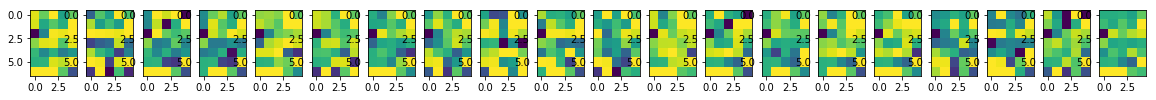

In [68]:
plotFeatures(images_1, 20)

Transforming the features as 2 dimensional images (with no rgb dimensions) reveals a new patern: Records representing patients with life at risk show predominat higher overal values, which is represented as lighter average color per image.

In [69]:
from keras.layers import Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  

def create_model():
    model = Sequential()
    ### Architecture
    model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(7, 5, 1)))
    model.add(MaxPooling2D(pool_size=2))
    #model.add(Dropout(0.1))
  
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(GlobalAveragePooling2D())

    model.add(Dense(2, activation='sigmoid'))
    model.summary()
  
    ### Model building

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[fbeta_score])
 
    return model


### Compile the Model

In [70]:
from keras.wrappers.scikit_learn import KerasClassifier

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
#sk_params = {'callbacks': [checkpointer]}

#model = KerasClassifier(build_fn=create_model, epochs=3, batch_size=1000, verbose=1)

echocs = 3
batch_size = 1000
model = create_model()
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=100, batch_size=1000, callbacks=[checkpointer], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 7, 5, 16)          80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 2, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 2, 32)          2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 2,226
Trainable params: 2,226
Non-trainable params: 0
_________________________________________________________________
Train on

1805281/1805281 [==============================] - 15s 8us/step - loss: 0.1557 - fbeta_score: 0.9359 - val_loss: 0.1660 - val_fbeta_score: 0.9302

Epoch 00030: val_loss did not improve from 0.15652
Epoch 31/100
1805281/1805281 [==============================] - 15s 8us/step - loss: 0.1553 - fbeta_score: 0.9362 - val_loss: 0.1569 - val_fbeta_score: 0.9363

Epoch 00031: val_loss did not improve from 0.15652
Epoch 32/100
1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1550 - fbeta_score: 0.9363 - val_loss: 0.1561 - val_fbeta_score: 0.9360

Epoch 00032: val_loss improved from 0.15652 to 0.15612, saving model to weights.best.from_scratch.hdf5
Epoch 33/100
1805281/1805281 [==============================] - 15s 8us/step - loss: 0.1546 - fbeta_score: 0.9366 - val_loss: 0.1558 - val_fbeta_score: 0.9368

Epoch 00033: val_loss improved from 0.15612 to 0.15576, saving model to weights.best.from_scratch.hdf5
Epoch 34/100
1805281/1805281 [==============================] - 1

1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1501 - fbeta_score: 0.9393 - val_loss: 0.1504 - val_fbeta_score: 0.9394

Epoch 00067: val_loss improved from 0.15231 to 0.15044, saving model to weights.best.from_scratch.hdf5
Epoch 68/100
1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1500 - fbeta_score: 0.9394 - val_loss: 0.1508 - val_fbeta_score: 0.9391

Epoch 00068: val_loss did not improve from 0.15044
Epoch 69/100
1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1498 - fbeta_score: 0.9394 - val_loss: 0.1535 - val_fbeta_score: 0.9375

Epoch 00069: val_loss did not improve from 0.15044
Epoch 70/100
1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1497 - fbeta_score: 0.9394 - val_loss: 0.1512 - val_fbeta_score: 0.9389

Epoch 00070: val_loss did not improve from 0.15044
Epoch 71/100
1805281/1805281 [==============================] - 16s 9us/step - loss: 0.1496 - fbeta_score: 0.9395 - v

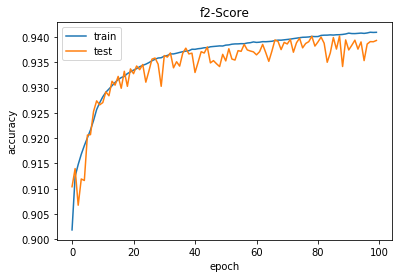

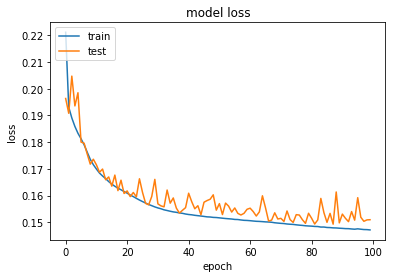

In [71]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('f2-Score')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Validation
## Evaluating unseen data from original dataset

In [72]:
from sklearn.model_selection import KFold

evaluate = model.evaluate(X_val, y_val)
print(model.metrics_names)
print(evaluate)
 

90265/90265 [==============================] - 2s 25us/step
['loss', 'fbeta_score']
[0.149866445367768, 0.9391701570820005]


## Evaluating unseen data from validation dataset

In [73]:
dataset_validation = pd.read_csv("datasets/dataset_validation.csv")

labels_validation = dataset_validation[['RIESGO_VIDA']].values
features_validation = dataset_validation.drop(['RIESGO_VIDA'], axis = 1).values

X_validation = np.asarray(list(map(lambda row: row.reshape(7,5,1), features_validation)))
y_validation = to_categorical(labels_validation, 2)

evaluate = model.evaluate(X_validation, y_validation)
print(model.metrics_names)
print(evaluate)

118769/118769 [==============================] - 2s 18us/step
['loss', 'fbeta_score']
[0.14949501160638598, 0.9400565815533598]
